[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/03_umap_world.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/03_umap_world.ipynb)

In [1]:
from datasets import load_dataset

geo = load_dataset('jamescalam/world-cities-geo', split='train')
geo

Using custom data configuration jamescalam--world-cities-geo-72504c3877250069
Reusing dataset json (/Users/jamesbriggs/.cache/huggingface/datasets/json/jamescalam--world-cities-geo-72504c3877250069/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


Dataset({
    features: ['city', 'country', 'region', 'continent', 'latitude', 'longitude', 'x', 'y', 'z'],
    num_rows: 9083
})

In [2]:
import plotly.express as px

palette = ['#1c17ff', '#faff00', '#8cf1ff', '#000000', '#030080', '#738fab']

fig = px.scatter_3d(
    x=geo['x'], y=geo['y'], z=geo['z'],
    color=geo['continent'],
    custom_data=[geo['country'], geo['city']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}"
    ])
)

In [3]:
fig.write_html("umap-earth-3d.html", include_plotlyjs="cdn", full_html=False)

We can place our x, y, z data into an array for use with UMAP.

In [4]:
import numpy as np

geo_arr = np.asarray([geo['x'], geo['y'], geo['z']]).T
geo_arr = geo_arr / geo_arr.max()
geo_arr[:5]

array([[0.29402237, 0.77334166, 0.56897568],
       [0.35190117, 0.77937458, 0.52628951],
       [0.31308636, 0.74162046, 0.60017983],
       [0.38680896, 0.73333815, 0.56642192],
       [0.27717615, 0.78055574, 0.56757901]])

Our data is now ready for use.

### UMAP Dim Reduction

First we make sure UMAP is install with either:

```bash
conda install -c conda-forge umap-learn
```

*or*

```bash
pip install umap-learn
```

In [5]:
import umap

In [6]:
colors = geo['continent']
c_map = {
    'Africa': '#8cf1ff',
    'Asia': '#1c17ff',
    'Europe': '#faff00',
    'North America': '#738fab',
    'Oceania': '#030080',
    'South America': '#000000'
}
for i in range(len(colors)):
    colors[i] = c_map[colors[i]]
colors[:5]

['#1c17ff', '#1c17ff', '#1c17ff', '#1c17ff', '#1c17ff']

100%|██████████| 9/9 [01:09<00:00,  7.68s/it]


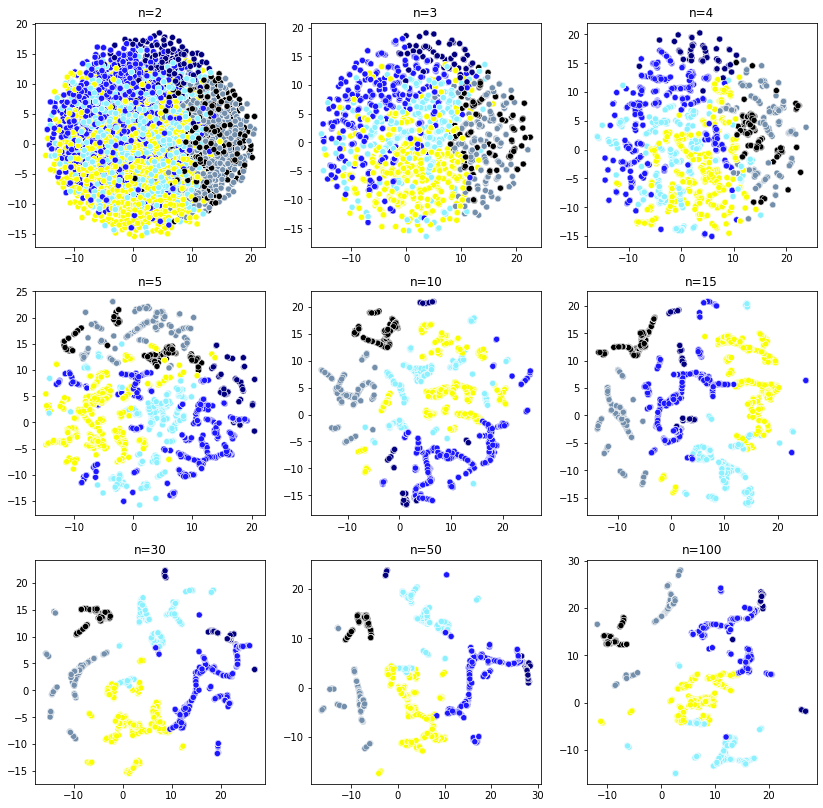

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(geo_arr)
    sns.scatterplot(x=u[:,0], y=u[:,1], c=colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

 11%|█         | 1/9 [00:09<01:13,  9.19s/it]/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

100%|██████████| 9/9 [01:30<00:00, 10.00s/it]


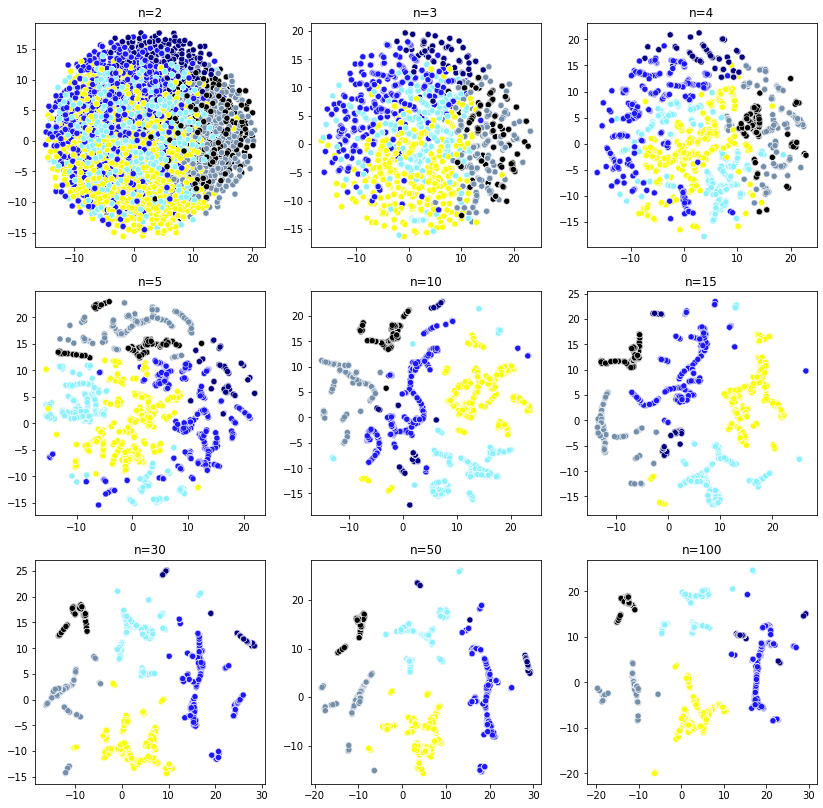

In [8]:
target = geo['continent']
t_map = {
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North America': 3,
    'Oceania': 4,
    'South America': 5
}
for i in range(len(target)):
    target[i] = t_map[target[i]]

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(geo_arr, y=target)
    sns.scatterplot(x=u[:,0], y=u[:,1], c=colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [9]:
import umap

fit = umap.UMAP(n_neighbors=50, min_dist=0.5)
u = fit.fit_transform(geo_arr)

fig = px.scatter(
    x=u[:,0], y=u[:,1],
    color=geo['continent'],
    custom_data=[geo['country'], geo['city']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}"
    ])
)

In [10]:
fig.write_html("umap-earth-2d.html", include_plotlyjs="cdn", full_html=False)

We will cluster this data later so now save to file.

In [ ]:
import pandas as pd

umapped = pd.DataFrame({
    'x': u[:,0],
    'y': u[:,1],
    'continent': geo['continent'],
    'country': geo['country'],
    'city': geo['city']
})

umapped.to_csv('umapped.csv', sep='|', index=False)

Lets compare these two PCA and t-SNE...

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # this means we will create 2-d space
p = pca.fit_transform(geo_arr)
fig = px.scatter(
    x=p[:,0], y=p[:,1],
    color=geo['continent'],
    custom_data=[geo['country'], geo['city']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}"
    ])
)

In [13]:
fig.write_html("pca-earth-2d.html", include_plotlyjs="cdn", full_html=False)

  0%|          | 0/9 [00:00<?, ?it/s]/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

 11%|█         | 1/9 [00:16<02:13, 16.68s/it]/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

 22%|██▏       | 2/9 [00:33<01:56, 16.61s/it]/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The defa

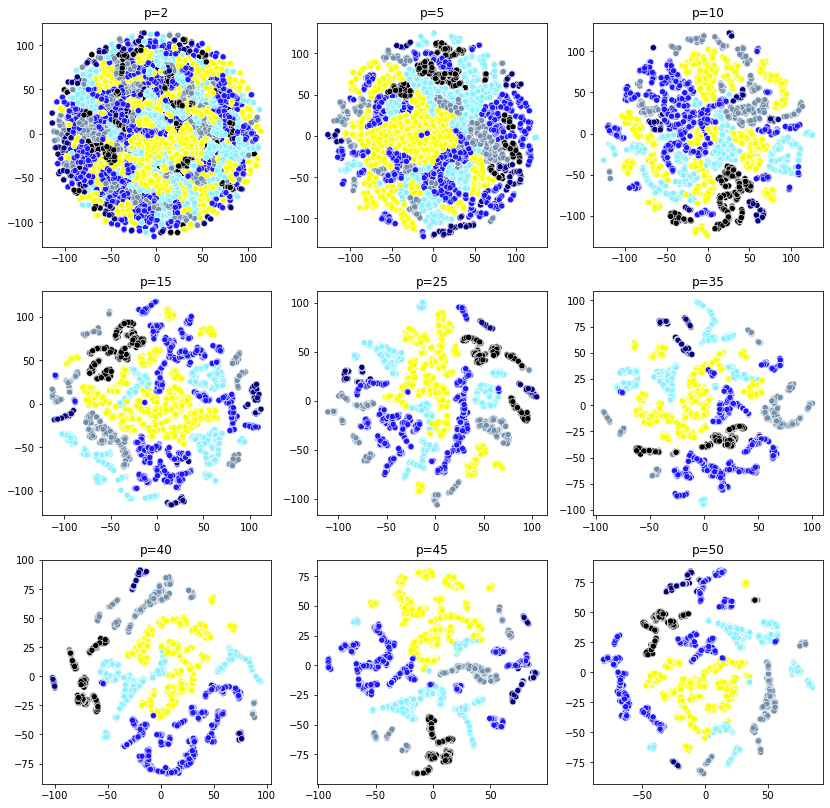

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
pps = [2, 5, 10, 15, 25, 35, 40, 45, 50]
i, j = 0, 0
for perplexity in tqdm(pps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    t = tsne.fit_transform(geo_arr)
    sns.scatterplot(x=t[:,0], y=t[:,1], c=colors, ax=ax[j, i])
    ax[j, i].set_title(f'p={perplexity}')
    if i < 2: i += 1
    else: i = 0; j += 1

Note that t-SNE seems to move all over the place, there is a lot of randomness in t-SNE, which is a key reason people don't like it. It also scales terribly and becomes very inefficient when reducing to more than 2-3 dimensions.

In [15]:
tsne = TSNE(n_components=2, perplexity=45)
t = tsne.fit_transform(geo_arr)

fig = px.scatter(
    x=t[:,0], y=t[:,1],
    color=geo['continent'],
    custom_data=[geo['country'], geo['city']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}"
    ])
)
fig.write_html("tsne-earth-2d.html", include_plotlyjs="cdn", full_html=False)

/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/anaconda3/envs/stoic/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [16]:
fig.show()

---